<a href="https://colab.research.google.com/github/veritaem/Project2/blob/master/Copy_of_Kaggle_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#first up is some imports

In [2]:
!pip install category_encoders

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, PolynomialFeatures
from sklearn.metrics import precision_score, r2_score, mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, recall_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
import seaborn as sns
import category_encoders as ce
import xgboost as xgb

In [0]:

pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/veritaem/Project2/master/train_features.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/veritaem/Project2/master/train_labels.csv')
testdf = pd.read_csv('https://raw.githubusercontent.com/veritaem/Project2/master/test_features.csv')

#next up is to look at the data

In [6]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
df = df1.join(df2, rsuffix = 'status_group')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,idstatus_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


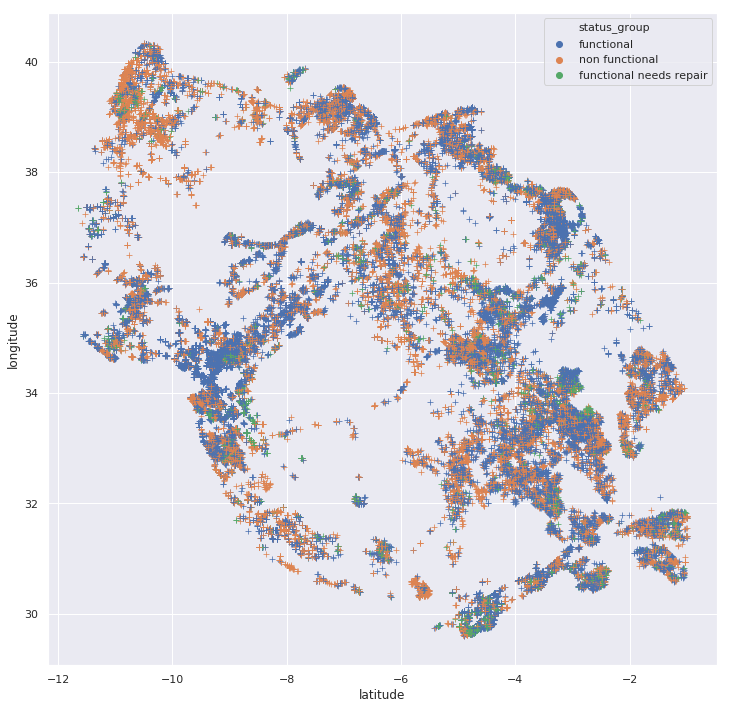

In [9]:
df = df[df['longitude'] != 0]
sns.set(rc={'figure.figsize':(12, 12)})
sns.scatterplot(x=df.latitude, y=df.longitude, hue = df.status_group, marker = '+')

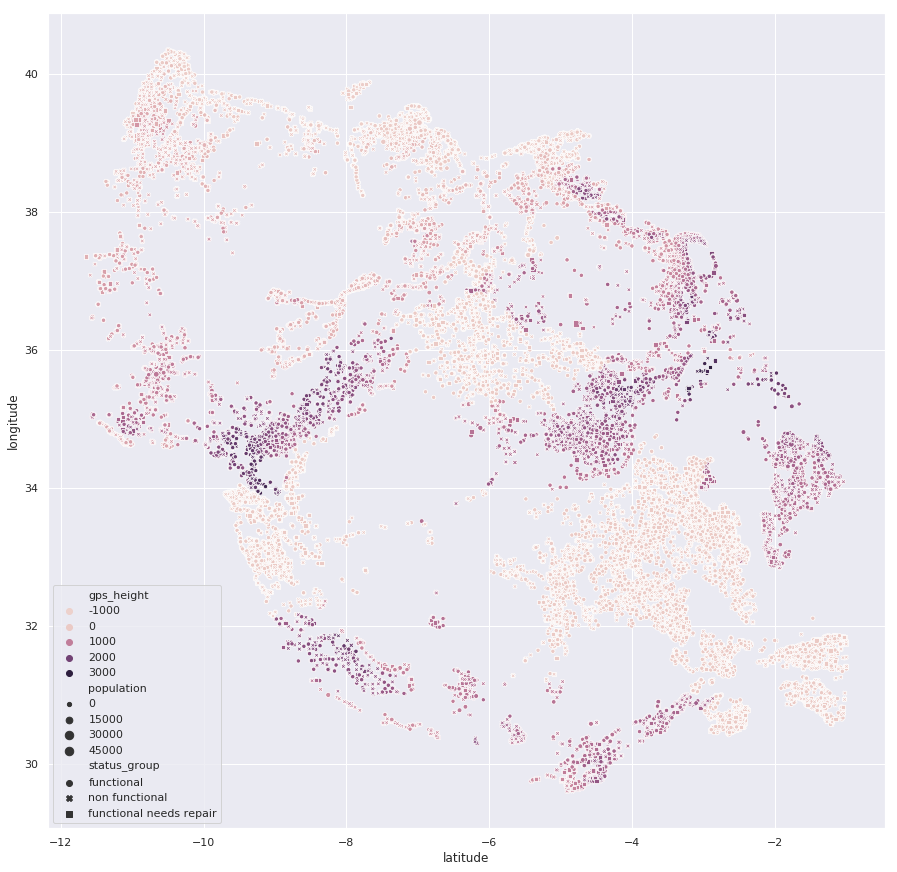

In [25]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.scatterplot(x=df.latitude, y=df.longitude, hue = df.gps_height, style = df.status_group, size = df.population)

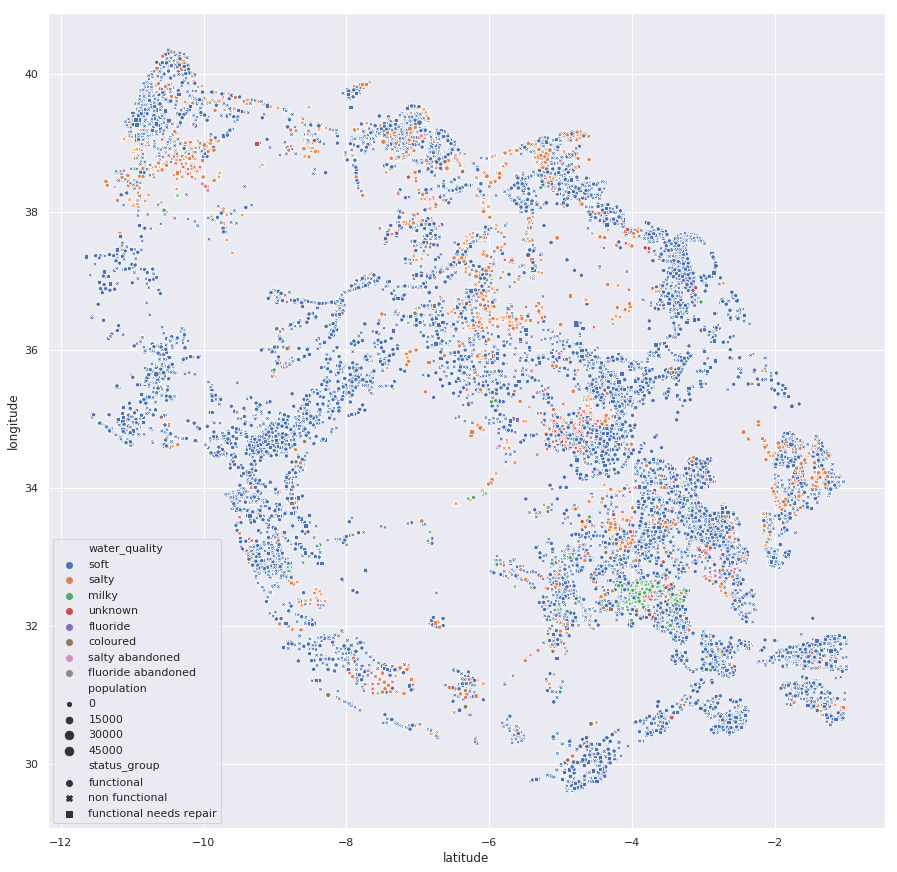

In [26]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.scatterplot(x=df.latitude, y=df.longitude, hue = df.water_quality, style = df.status_group, size = df.population)

In [0]:
id = pd.DataFrame(testdf['id'])

In [0]:
df.shape

(59400, 42)

In [0]:
df['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [0]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [0]:
testdf.shape

(14358, 40)

In [0]:
nan_values_list = ['Not Known', 'Unknown', 'None', 'Not known', 'not known',
                  '-', 'unknown', 'Unknown Installer', '##', 'none', '0']

df = df.replace(nan_values_list, np.nan)
testdf = testdf.replace(nan_values_list, np.nan)

df = df.replace(np.nan, 'unknown')
testdf = testdf.replace(np.nan, 'unknown')

In [0]:
df.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [0]:
yencode = df['status_group'].replace({'functional':2, 'functional needs repair':1, 'non functional':0})
yencode = pd.DataFrame(yencode)
yencode.head()

,status_group
0,2
1,2
2,2
3,0
4,2


In [0]:
'''because certain columns seem unimportant, redundant, 
or missing most of their values, 
I will drop them in this cell, to be modified as needed later'''
df2 = df.drop(['scheme_name', 'public_meeting', 'payment_type', 'region', 'idstatus_group', 'recorded_by', 'latitude', 'longitude'],axis = 1)
testdf = testdf.drop(['scheme_name', 'public_meeting', 'payment_type', 'region', 'recorded_by', 'latitude', 'longitude'],axis = 1)

# ok, time for baselines


In [0]:
yencode.status_group.mean()

1.1588383838383838

In [0]:
baseline = [yencode.status_group.mean()] * len(yencode.status_group)  
mean_absolute_error(yencode.status_group, baseline)

0.9136374604632181

In [0]:
maj_classification = yencode.status_group.mode()
y_pred = np.full(shape=yencode['status_group'].shape, fill_value=maj_classification)
recall_score(yencode['status_group'], y_pred, average = 'micro')

0.543080808080808

#bins and engineering?

In [0]:
df2['latlong'] = abs(df['latitude'].round(2)) + abs(df['longitude'].round(2))
testdf['latlong'] = abs(df['latitude'].round(2)) + abs(df['longitude'].round(2))

In [0]:
'''I see two values that would really ebnefit from a bin, and those are 
population and construction year, lets do it!'''

'I see two values that would really ebnefit from a bin, and those are \npopulation and construction year, lets do it!'

In [0]:
year_bins = [-1, 1980, 1990, 2000, 2010, 2020]
year_labels = [1, 2, 3, 4, 5]
df2['year_made'] = pd.cut(df2['construction_year'], bins = year_bins, labels = year_labels)
testdf['year_made'] = pd.cut(testdf['construction_year'], bins = year_bins, labels = year_labels)

In [0]:
pop_bins = [-1, 10, 20, 100, 250, 1000, 5000, 10000, 100000]
pop_labels = [1, 2, 3, 4, 5, 6, 7, 8]
df2['pop'] = pd.cut(df2['population'], bins = pop_bins, labels = pop_labels)
testdf['pop'] = pd.cut(testdf['population'], bins = pop_bins, labels = pop_labels)

Alright, lets see what we can see! *woosh woosh woosh*

In [0]:
df2.describe(include = 'all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,latlong,year_made,pop
count,59400.000000,59400.000000,59400,59400,59400.000000,59400,59400,59400.000000,59400,59400,59400.000000,59400.000000,59400,59400,59400.000000,59400,59400,59400.000000,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400.000000,59400.0,59400.0
unique,NaN,NaN,356,1894,NaN,2139,37397,NaN,9,19287,NaN,NaN,125,2092,NaN,12,3,NaN,18,13,7,12,5,7,8,6,5,5,10,7,3,7,6,3,NaN,5.0,8.0
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,unknown,NaN,Lake Victoria,Madukani,NaN,NaN,Njombe,Igosi,NaN,VWC,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,NaN,1.0,1.0
freq,NaN,NaN,572,9084,NaN,17402,3588,NaN,10248,508,NaN,NaN,2503,307,NaN,36793,38852,NaN,26780,26780,26780,40507,52490,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259,NaN,26464.0,28690.0
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,NaN,0.474141,NaN,NaN,15.297003,5.629747,NaN,NaN,179.909983,NaN,NaN,1300.652475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.783436,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,NaN,12.236230,NaN,NaN,17.587406,9.633649,NaN,NaN,471.482176,NaN,NaN,951.620547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.263585,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.980000,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,NaN,0.000000,NaN,NaN,12.000000,3.000000,NaN,NaN,25.000000,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.900000,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,NaN,0.000000,NaN,NaN,17.000000,5.000000,NaN,NaN,215.000000,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.910000,NaN,NaN


In [0]:
df2['installer'].value_counts()
# i wanted to reduce the number of uniwue variables in each column, and it looks like a jackpot!
#a bunch of these look similar to each other (i.e. gover, government of Tanzania, Gover Dept water, etc)


DWE                               17402
unknown                            4481
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
KKKT                                898
Hesawa                              840
TCRS                                707
Central government                  622
CES                                 610
Community                           553
DANID                               552
District Council                    551
HESAWA                              539
LGA                                 408
World vision                        408
WEDECO                              397
TASAF                               396
District council                    392
Gover                               383
AMREF                               329
TWESA                               316
WU                                  301
Dmdd                                287


In [0]:
red_list = ['Government', 'Central government', 'Central Govt', 'GOVER', 'Gover',
            'Gove', 'Centr', 'Central Government', 'Wizara ya maji', 'Water', 
            'GOVERNMENT', 'Tanzania Government', 'GOVERN', 'central government',
           'ISF/Government', 'CENTRAL GOVERNMENT', 'MINISTRY OF WATER', 
            'Ministry of water engineer', 'Cental Government', 'ADRA/Government']

list2 = ['World vision', 'World Vision', 'WORLD VISION', 'World Vission', 
        'World Division', 'Government /World Vision', 'World visiin']


df2['installer'] = df2['installer'].replace(red_list, 'government')
df2['installer'] = df2['installer'].replace(list2, 'World Vision')

testdf['installer'] = testdf['installer'].replace(red_list, 'government')
testdf['installer'] = testdf['installer'].replace(list2, 'World Vision')

In [0]:
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*secondary.*$)', 'school')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*school.*$)', 'school')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*shule.*$)', 'school')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*sekondari.*$)', 'school')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*msingi.*$)', 'school')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*primary.*$)', 'school')

df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*clinic.*$)', 'health')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*hospital.*$)', 'health')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*zahanati.*$)', 'health')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*health.*$)', 'health')

df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*ccm.*$)', 'official')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*office.*$)', 'official')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*kijiji.*$)', 'official')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*ofis.*$)', 'official')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*idara.*$)', 'offical')

df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*maziwa.*$)', 'farm')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*farm.*$)', 'farm')

df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*maji.*$)', 'pump')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*water.*$)', 'pump')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*pump house.*$)', 'pump')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*pump.*$)', 'pump')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*bombani.*$)', 'pump')

df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*center.*$)', 'center')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*madukani.*$)', 'center')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*sokoni.*$)', 'center')
df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*market.*$)', 'center')

df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*kwa.*$)', 'name')

value_counts = df2['wpt_name'].value_counts()
to_remove = value_counts[value_counts <= 300].index
df2['wpt_name'].replace(to_remove, 'other', inplace=True)

df2['wpt_name'] = df2.wpt_name.str.replace(r'((?i)^.*none.*$)', 'other')

In [0]:
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*secondary.*$)', 'school')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*school.*$)', 'school')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*shule.*$)', 'school')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*sekondari.*$)', 'school')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*msingi.*$)', 'school')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*primary.*$)', 'school')

testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*clinic.*$)', 'health')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*hospital.*$)', 'health')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*zahanati.*$)', 'health')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*health.*$)', 'health')

testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*ccm.*$)', 'official')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*office.*$)', 'official')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*kijiji.*$)', 'official')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*ofis.*$)', 'official')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*idara.*$)', 'offical')

testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*maziwa.*$)', 'farm')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*farm.*$)', 'farm')

testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*maji.*$)', 'pump')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*water.*$)', 'pump')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*pump house.*$)', 'pump')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*pump.*$)', 'pump')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*bombani.*$)', 'pump')

testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*center.*$)', 'center')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*madukani.*$)', 'center')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*sokoni.*$)', 'center')
testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*market.*$)', 'center')

testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*kwa.*$)', 'name')

value_counts = testdf['wpt_name'].value_counts()
to_remove = value_counts[value_counts <= 300].index
testdf['wpt_name'].replace(to_remove, 'other', inplace=True)

testdf['wpt_name'] = testdf.wpt_name.str.replace(r'((?i)^.*none.*$)', 'other')

In [0]:
df2['wpt_name'].nunique()

10

In [0]:
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,latlong,year_made,pop
0,69572,6000.0,2011-03-14,Roman,1390,Roman,unknown,0,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,109,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,44.80,3,4
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,health,0,Lake Victoria,Nyamara,20,2,Serengeti,Natta,280,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,36.85,4,5
2,34310,25.0,2013-02-25,Lottery Club,686,World Vision,name,0,Pangani,Majengo,21,4,Simanjiro,Ngorika,250,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,41.28,4,4
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,health,0,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,49.65,2,3
4,19728,0.0,2011-07-13,Action In A,0,Artisan,school,0,Lake Victoria,Kyanyamisa,18,1,Karagwe,Nyakasimbi,0,unknown,True,0,gravity,gravity,gravity,other,other,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,32.96,1,1


In [0]:
testdf.nunique()

id                       14358
amount_tsh                  67
date_recorded              331
funder                     957
gps_height                2142
installer                 1053
wpt_name                     4
num_private                 36
basin                        9
subvillage                8254
region_code                 26
district_code               20
lga                        124
ward                      1934
population                 631
scheme_management           12
permit                       3
construction_year           55
extraction_type             17
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoi

In [0]:
series = df2['lga'].copy()
series[series.str.contains('Rural')] = 'rural'
series[series.str.contains('Urban')] = 'urban'
other_flag = series.str.contains('rural') | series.str.contains('urban')
other_flag = other_flag == False
series[other_flag] = 'other'

df2['lga'] = series

series = testdf['lga'].copy()
series[series.str.contains('Rural')] = 'rural'
series[series.str.contains('Urban')] = 'urban'
other_flag = series.str.contains('rural') | series.str.contains('urban')
other_flag = other_flag == False
series[other_flag] = 'other'

testdf['lga'] = series

In [0]:
df2['population'] = df2['population'].astype(int)
testdf['population'] = testdf['population'].astype(int)

In [0]:
df2.groupby(['water_quality', 'basin']).count()

id  amount_tsh  date_recorded  funder  gps_height  installer  wpt_name  num_private  subvillage  region_code  district_code   lga  ward  population  scheme_management  permit  construction_year  extraction_type  extraction_type_group  extraction_type_class  management  management_group  payment  quality_group  quantity  quantity_group  source  source_type  source_class  waterpoint_type  waterpoint_type_group  status_group  latlong  year_made   pop
water_quality      basin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
coloured           Internal                   66          66             66      66          66         66        66           66          66           66             66    66    66          66                 66      66                 66               66                     66                     66          66                66       66             66        66              66      66           66            66               66                     66            66       66         66    66
                   Lake Nyasa                  7           7              7       7           7          7         7            7           7            7              7     7     7           7                  7       7                  7                7                      7                      7           7                 7        7              7         7               7       7            7             7                7                      7             7        7          7     7
                   Lake Rukwa                  8           8              8       8           8          8         8            8           8            8              8     8     8           8                  8       8                  8                8                      8                      8           8                 8        8              8         8               8       8            8             8                8                      8             8        8          8     8
                   Lake Tanganyika            64          64             64      64          64         64        64           64          64           64             64    64    64          64                 64      64                 64               64                     64                     64          64                64       64             64        64              64      64           64            64               64                     64            64       64         64    64
                   Lake Victoria              49          49             49      49          49         49        49           49          49           49             49    49    49          49                 49      49                 49               49                     49                     49          49                49       49             49        49              49      49           49            49               49                     49            49       49         49    49
                   Pangani                    35          35             35      35          35         35        35           35          35           35             35    35    35          35                 35      35                 35               35                     35                     35          35                35       35             35        35              35      35           35            35               35                     35            35       35         35    35
                   Rufiji                    183         183  

In [0]:
df2.groupby(['management', 'status_group']).count()

id  amount_tsh  date_recorded  funder  gps_height  installer  wpt_name  num_private  basin  subvillage  region_code  district_code    lga   ward  population  scheme_management  permit  construction_year  extraction_type  extraction_type_group  extraction_type_class  management_group  payment  water_quality  quality_group  quantity  quantity_group  source  source_type  source_class  waterpoint_type  waterpoint_type_group  latlong  year_made    pop
management       status_group                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
company          functional                 267         267            267     267         267        267       267          267    267         267          267            267    267    267         267                267     267                267              267                    267                    267               267      267            267            267       267             267     267          267           267              267                    267      267        267    267
                 functional needs repair     15          15             15      15          15         15        15           15     15          15           15             15     15     15          15                 15      15                 15               15                     15                     15                15       15             15             15        15              15      15           15            15               15                     15       15         15     15
                 non functional             403         403            403     403         403        403       403          403    403         403          403            403    403    403         403                403     403                403              403                    403                    403               403      403            403            403       403             403     403          403           403              403                    403      403        403    403
other            functional                 505         505            505     505         505        505       505          505    505         505          505            505    505    505         505                505     505                505              505                    505                    505               505      505            505            505       505             505     505          505           505              505                    505      505        505    505
                 functional needs repair     55          55             55      55          55         55        55           55     55          55           55             55     55     55          55                 55      55                 55               55                     55                     55                55       55             55             55        55              55      55           55            55               55                     55       55         55     55
                 non functional             284         284            284     284         284        284       284          284    284         284          284            284    284    284         284                284     284                284              284                    284                    284               284      284            284            284       284             284     284          284           284              284                    284      284        284    284
other - school   functional                  23          23             23   

In [0]:
df2['status_group'].groupby(df2['water_quality']).count()

water_quality
coloured                490
fluoride                200
fluoride abandoned       17
milky                   804
salty                  4856
salty abandoned         339
soft                  50818
unknown                1876
Name: status_group, dtype: int64

In [0]:
df2.date_recorded.unique()

array(['2011-03-14', '2013-03-06', '2013-02-25', '2013-01-28',
       '2011-07-13', '2011-03-13', '2012-10-01', '2012-10-09',
       '2012-11-03', '2011-08-03', '2011-02-20', '2013-02-18',
       '2012-10-14', '2013-03-15', '2012-10-20', '2011-08-04',
       '2011-07-04', '2011-09-04', '2011-07-22', '2011-02-22',
       '2011-02-27', '2013-02-10', '2011-10-04', '2013-11-03',
       '2013-01-21', '2013-01-16', '2011-07-11', '2013-03-05',
       '2013-03-16', '2011-03-23', '2011-03-16', '2013-03-19',
       '2011-03-11', '2011-02-23', '2013-03-28', '2011-07-16',
       '2011-03-27', '2013-02-11', '2013-10-03', '2011-03-12',
       '2011-07-07', '2013-01-15', '2013-03-18', '2012-10-22',
       '2013-02-05', '2011-07-27', '2011-04-04', '2013-02-21',
       '2011-08-18', '2011-07-31', '2011-08-01', '2011-07-14',
       '2013-02-22', '2013-07-03', '2013-08-03', '2013-01-22',
       '2011-03-22', '2013-05-03', '2013-01-19', '2013-02-09',
       '2011-01-04', '2013-02-04', '2011-03-05', '2011-

In [0]:
df2['2011'] = df2['date_recorded'].str.contains('2011', na=False, regex=True)
df2['2012'] = df2['date_recorded'].str.contains('2012', na=False, regex=True)
df2['2013'] = df2['date_recorded'].str.contains('2013', na=False, regex=True)

testdf['2011'] = testdf['date_recorded'].str.contains('2011', na=False, regex=True)
testdf['2012'] = testdf['date_recorded'].str.contains('2012', na=False, regex=True)
testdf['2013'] = testdf['date_recorded'].str.contains('2013', na=False, regex=True)

In [0]:
df2['2011'] = df2['2011'].replace(True, 2011)
df2['2012'] = df2['2012'].replace(True, 2012)
df2['2013'] = df2['2013'].replace(True, 2013)

testdf['2011'] = testdf['2011'].replace(True, 2011)
testdf['2012'] = testdf['2012'].replace(True, 2012)
testdf['2013'] = testdf['2013'].replace(True, 2013)

larger = lambda s1, s2: s1 if s1.sum() > s2.sum() else s2

df2['yrs_intermediate'] = df2['2011'].combine(df2['2012'], larger)
df2['yrs_intermediate'] = df2['yrs_intermediate'].combine(df2['2013'], larger)
df2['yrs in operation'] = df2['yrs_intermediate'] - df2['construction_year']


testdf['yrs_intermediate'] = testdf['2011'].combine(testdf['2012'], larger)
testdf['yrs_intermediate'] = testdf['yrs_intermediate'].combine(testdf['2013'], larger)
testdf['yrs in operation'] = testdf['yrs_intermediate'] - testdf['construction_year']



df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,latlong,year_made,pop,2011,2012,2013,yrs_intermediate,yrs in operation
0,69572,6000.0,2011-03-14,Roman,1390,Roman,unknown,0,Lake Nyasa,Mnyusi B,11,5,other,Mundindi,109,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,44.80,3,4,2011.0,0.0,0.0,2011.0,12.0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,health,0,Lake Victoria,Nyamara,20,2,other,Natta,280,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,36.85,4,5,0.0,0.0,2013.0,2013.0,3.0
2,34310,25.0,2013-02-25,Lottery Club,686,World Vision,name,0,Pangani,Majengo,21,4,other,Ngorika,250,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,41.28,4,4,0.0,0.0,2013.0,2013.0,4.0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,health,0,Ruvuma / Southern Coast,Mahakamani,90,63,other,Nanyumbu,58,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,49.65,2,3,0.0,0.0,2013.0,2013.0,27.0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,school,0,Lake Victoria,Kyanyamisa,18,1,other,Nyakasimbi,0,unknown,True,0,gravity,gravity,gravity,other,other,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,32.96,1,1,2011.0,0.0,0.0,2011.0,2011.0


In [0]:
df2['source_type'].unique()

array(['spring', 'rainwater harvesting', 'dam', 'borehole', 'other',
       'shallow well', 'river/lake'], dtype=object)

#X and y, pipe it!

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
X = df2.drop(['status_group', 'funder', 'installer', 'subvillage', 'construction_year', 'num_private',
             'extraction_type_group', 'quantity_group', 'source_class', 'source_type', 'subvillage',
             'permit', 'date_recorded', '2011', '2012', '2013', 'id', 'waterpoint_type_group',
             'amount_tsh', 'management_group', 'district_code', 'quality_group',
             'extraction_type_class'], axis = 1)
y = df2['status_group']

Xtdf = testdf.drop(['funder', 'installer', 'subvillage', 'construction_year', 'num_private',
                   'extraction_type_group', 'quantity_group', 'source_class', 'source_type', 'subvillage',
                   'permit', 'date_recorded', '2011', '2012', '2013', 'id', 'waterpoint_type_group',
                   'amount_tsh', 'management_group', 'district_code', 'quality_group',
                   'extraction_type_class'], axis = 1)

In [0]:
Xtdf.head()

,gps_height,wpt_name,basin,region_code,lga,ward,population,scheme_management,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,latlong,year_made,pop,yrs_intermediate,yrs in operation
0,1996,school,Internal,21,other,Bashay,321,Parastatal,other,parastatal,never pay,soft,seasonal,rainwater harvesting,other,44.80,5,5,2013.0,1.0
1,1569,other,Pangani,2,rural,Kimnyaki,300,VWC,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,36.85,3,5,2013.0,13.0
2,1567,school,Internal,13,rural,Puma,500,VWC,other,vwc,never pay,soft,insufficient,rainwater harvesting,other,41.28,4,5,2013.0,3.0
3,267,name,Ruvuma / Southern Coast,80,other,Mkutano,250,VWC,other,vwc,unknown,soft,dry,shallow well,other,49.65,2,4,2013.0,26.0
4,1260,name,Ruvuma / Southern Coast,10,other,Mbinga Urban,60,Water Board,gravity,water board,pay monthly,soft,enough,spring,communal standpipe,32.96,3,3,2013.0,13.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(testdf.shape)
print(Xtdf.shape)

(44550, 20)
(14850, 20)
(44550,)
(14850,)
(14358, 41)
(14358, 20)


In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RobustScaler(),
    LogisticRegression()
)

In [0]:
pipeline2 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    PolynomialFeatures(2),
    RobustScaler(),
    LogisticRegression()
)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
pipelinef = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RobustScaler(),
    RandomForestClassifier(n_estimators = 1000)
)

In [0]:
X_train.nunique()

gps_height           2377
wpt_name               10
basin                   9
region_code            27
lga                     3
ward                 2078
population            937
scheme_management      12
extraction_type        18
management             12
payment                 7
water_quality           8
quantity                5
source                 10
waterpoint_type         7
latlong              3212
year_made               5
pop                     8
yrs_intermediate        4
yrs in operation       69
dtype: int64

In [0]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7418855218855219

In [0]:
pipelinef.fit(X_train, y_train)
y_pred = pipelinef.predict(X_test)
accuracy_score(y_test, y_pred)

0.7954882154882155

In [0]:
subby = pipelinef.predict(Xtdf)
print(subby.shape)
subby = pd.DataFrame(subby)
subs = id.join(subby, rsuffix = '0')
subs = subs.rename(index=str, columns={0:'status_group'})
print(subs.shape)
subs.head()

(14358,)
(14358, 2)


,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [0]:
subs.to_csv('forest_for_the_trees.csv', index=False)

In [0]:
subby = pipeline.predict(Xtdf)
print(subby.shape)
subby = pd.DataFrame(subby)
subs = id.join(subby, rsuffix = '0')
subs = subs.rename(index=str, columns={0:'status_group'})
print(subs.shape)
subs.head()

(14358,)
(14358, 2)


,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [0]:
subs.to_csv('sub1.csv', index=False)

In [0]:
y_train_e = y_train.replace({'functional':2, 'functional needs repair':1, 'non functional':0})
y_test_e = y_test.replace({'functional':2, 'functional needs repair':1, 'non functional':0})

In [0]:
pipeline3 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RobustScaler(),
    xgb.XGBClassifier()
)



In [0]:
#pipeline3.fit(X_train, y_train_e)
#y_pred2 = pipeline3.predict(X_test)
#print(accuracy_score(y_test_e, y_pred2))



In [0]:
#xgb_pred = pipeline3.predict(Xtdf)
#print(xgb_pred.shape)
#xgb_pred = pd.DataFrame(xgb_pred)
#subs2 = id.join(xgb_pred, rsuffix = '0')
#subs2 = subs2.rename(index=str, columns={0:'status_group'})
#print(subs2.shape)
#subs2.head()

In [0]:
#subs2.to_csv('sub2.csv', index=False)

In [0]:
param_grid = {
    'logisticregression__C': [.001, .01, 1, 10, ],
    'logisticregression__class_weight':[None]}


gs = GridSearchCV(pipeline, param_grid=param_grid, cv=3,
                  verbose=10)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] logisticregression__C=0.001, logisticregression__class_weight=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=0.001, logisticregression__class_weight=None, score=0.7120732610598612, total=  59.1s
[CV] logisticregression__C=0.001, logisticregression__class_weight=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=0.001, logisticregression__class_weight=None, score=0.7098316498316498, total=  57.2s
[CV] logisticregression__C=0.001, logisticregression__class_weight=None 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=0.001, logisticregression__class_weight=None, score=0.7137854400969762, total=  57.9s
[CV] logisticregression__C=0.01, logisticregression__class_weight=None 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=0.01, logisticregression__class_weight=None, score=0.7294458285637331, total=  58.5s
[CV] logisticregression__C=0.01, logisticregression__class_weight=None 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=0.01, logisticregression__class_weight=None, score=0.7286868686868687, total= 1.1min
[CV] logisticregression__C=0.01, logisticregression__class_weight=None 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.9min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=0.01, logisticregression__class_weight=None, score=0.7337194423866927, total=  58.2s
[CV] logisticregression__C=1, logisticregression__class_weight=None ..


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.5min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=1, logisticregression__class_weight=None, score=0.7616995488519291, total= 1.1min
[CV] logisticregression__C=1, logisticregression__class_weight=None ..


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 11.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=1, logisticregression__class_weight=None, score=0.762962962962963, total= 1.1min
[CV] logisticregression__C=1, logisticregression__class_weight=None ..


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 13.0min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=1, logisticregression__class_weight=None, score=0.7661121961074819, total= 1.2min
[CV] logisticregression__C=10, logisticregression__class_weight=None .


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 14.9min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=10, logisticregression__class_weight=None, score=0.7594101407312639, total= 1.2min
[CV] logisticregression__C=10, logisticregression__class_weight=None .


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=10, logisticregression__class_weight=None, score=0.7592592592592593, total= 1.2min
[CV] logisticregression__C=10, logisticregression__class_weight=None .


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  logisticregression__C=10, logisticregression__class_weight=None, score=0.7636877904235976, total= 1.2min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 20.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['wpt_name', 'basin', 'lga', 'ward', 'scheme_management', 'extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       return_df=Tru...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.001, 0.01, 1, 10], 'logisticregression__class_weight': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [0]:
validation_score = gs.best_score_

print('Cross-Validation Score:', validation_score)

print('Best estimator:', gs.best_estimator_)

Cross-Validation Score: 0.7635914702581369
Best estimator: Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['wpt_name', 'basin', 'lga', 'ward', 'scheme_management', 'extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       return_df=Tru...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])


In [0]:
selector = gs.best_estimator_.named_steps['polynomialfeatures']
all_names = X_train.columns
selected_mask = selector.get_feature_names()


print('Features selected:')
for name in selected_mask:
    print(name)

KeyError: ignored

In [0]:
y_pred = gs.predict(X_test)
cv_pred = pd.DataFrame(y_pred)

In [0]:
cv = id.join(cv_pred, rsuffix = '0')
cv = cv.rename(index=str, columns={0:'status_group'})
print(cv.shape)
cv.to_csv('cv.csv', index=False)

(14358, 2)


In [0]:
param_grid = {
    'logisticregression__C': [.01, 1, 10],
    'logisticregression__class_weight':['balanced', None]}


gs = GridSearchCV(pipeline2, param_grid=param_grid, cv=3,
                  verbose=10)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] logisticregression__C=0.01, logisticregression__class_weight=balanced 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
validation_score = gs.best_score_

print('Cross-Validation Score:', validation_score)

print('Best estimator:', gs.best_estimator_)

In [0]:
selector = gs.best_estimator_.named_steps['polynomialfeatures']
all_names = X_train.columns
selected_mask = selector.get_feature_names()


print('Features selected:')
for name in selected_mask:
    print(name)

In [0]:
y_pred = gs.predict(X_test)
y_pred = gs.predict(X_test)
cv_pred = pd.DataFrame(y_pred)
cv = id.join(y_pred, rsuffix = '0')
cv = cv.rename(index=str, columns={0:'status_group'})
print(cv.shape)
cv.to_csv('cv2.csv', index=False)

In [0]:
test_score = mean_absolute_error(y_test, y_pred)
print('Test Score:', test_score)